# **Create Dataset**


In [57]:
import requests
from bs4 import BeautifulSoup

import pandas as pd

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 11
page_size = 100

data_ = []

for i in range(0, pages+1):
  print(f"Page {i} scraped.")
  url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
  r = requests.get(url)
  content = r.content
  parsed_content = BeautifulSoup(content, 'html.parser')
  for para in parsed_content.find_all("div", {"class": "text_content"}):
    data_.append(para.get_text().split('|')[1])

print(f"->->->->->-> WOW!! {len(data_)} reviews collected in total.!!<-<-<-<-<-<-")

data = pd.DataFrame()
data['Reviews'] = data_
data

Page 0 scraped.
Page 1 scraped.
Page 2 scraped.
Page 3 scraped.
Page 4 scraped.
Page 5 scraped.
Page 6 scraped.
Page 7 scraped.
Page 8 scraped.
Page 9 scraped.
Page 10 scraped.
Page 11 scraped.
->->->->->-> WOW!! 1200 reviews collected in total.!!<-<-<-<-<-<-


,Reviews
0,Customer Service does not exist. One world e...
1,"Another really great pair of flights, on time..."
2,Our A380 developed a fault taxiing to the ru...
3,Horrible airline. Does not care about their c...
4,My family and I have flown mostly on British...
...,...
1195,London Heathrow to Mahon. Booked 9 months ag...
1196,Dubai to London Heathrow. Lovely flight and ...
1197,London Heathrow to Singapore on 28 May 2018....
1198,"Paris to Newark, flight cancelled. This expe..."





---


# Data Cleaning Started.

## 1. Convert our data into the Lowercase.

In [95]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data['newReviews'] = data['Reviews'].apply(lambda x:" ".join(x.lower() for x in x.split()))
data['newReviews'].head()

0    customer service does not exist. one world eme...
1    another really great pair of flights, on time,...
2    our a380 developed a fault taxiing to the runw...
3    horrible airline. does not care about their cu...
4    my family and i have flown mostly on british a...
Name: newReviews, dtype: object

## 2. Remove punctuation and perform Tokenization

In [96]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.corpus import wordnet


data['newReviews'] = data['newReviews'].str.replace('[^\w\s]', ' ')
data['newReviews']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-96-c77643e54641>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  data['newReviews'] = data['newReviews'].str.replace('[^\w\s]', ' ')


0       customer service does not exist  one world eme...
1       another really great pair of flights  on time ...
2       our a380 developed a fault taxiing to the runw...
3       horrible airline  does not care about their cu...
4       my family and i have flown mostly on british a...
                              ...                        
1195    london heathrow to mahon  booked 9 months ago ...
1196    dubai to london heathrow  lovely flight and a ...
1197    london heathrow to singapore on 28 may 2018  i...
1198    paris to newark  flight cancelled  this experi...
1199    i flew ba from heraklion to gatwick  i bought ...
Name: newReviews, Length: 1200, dtype: object

## 3. Removing Stopwords

In [97]:
from wordcloud import WordCloud, STOPWORDS
stop = stopwords.words('english')
data['newReviews'] = data['newReviews'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
data['newReviews']

0       customer service exist one world emerald frequ...
1       another really great pair flights time problem...
2       a380 developed fault taxiing runway returned g...
3       horrible airline care customers used decent si...
4       family flown mostly british airways last 30 ye...
                              ...                        
1195    london heathrow mahon booked 9 months ago flig...
1196    dubai london heathrow lovely flight great ba w...
1197    london heathrow singapore 28 may 2018 review r...
1198    paris newark flight cancelled experience one w...
1199    flew ba heraklion gatwick bought exit row seat...
Name: newReviews, Length: 1200, dtype: object

## 4. Performing Lemmatization

In [101]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def space(comment):
  doc = nlp(comment)
  return " ".join([token.lemma_ for token in doc])

data['newReviews'] = data['newReviews'].apply(space)
data['newReviews']

0       customer service exist one world emerald frequ...
1       another really great pair flight time problem ...
2       a380 develop fault taxiing runway return gate ...
3       horrible airline care customer use decent sinc...
4       family fly mostly british airways last 30 year...
                              ...                        
1195    london heathrow mahon book 9 month ago flight ...
1196    dubai london heathrow lovely flight great ba w...
1197    london heathrow singapore 28 may 2018 review r...
1198    paris newark flight cancel experience one bad ...
1199    fly ba heraklion gatwick buy exit row seat 3 o...
Name: newReviews, Length: 1200, dtype: object

## 5. Performing Sentiment Analysis using VADER

In [102]:
# !pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
  vs = analyzer.polarity_scores(review)
  return vs['compound']

data['newReviews_Pol_Scores'] = data['newReviews'].apply(vadersentimentanalysis)

def vaderanalysis(compound):
  if compound >= 0.5:
    return "Positive"
  if compound < 0:
    return "Negative"
  else:
    return "Neutral"

data['Analysis'] = data['newReviews_Pol_Scores'].apply(vaderanalysis)
data['Analysis']

0        Neutral
1       Positive
2       Negative
3       Negative
4       Positive
          ...   
1195    Positive
1196    Positive
1197    Positive
1198    Negative
1199     Neutral
Name: Analysis, Length: 1200, dtype: object

## 6. Plotting a PIE chart using Matplotlib

Positive    577
Negative    486
Neutral     137
Name: Analysis, dtype: int64


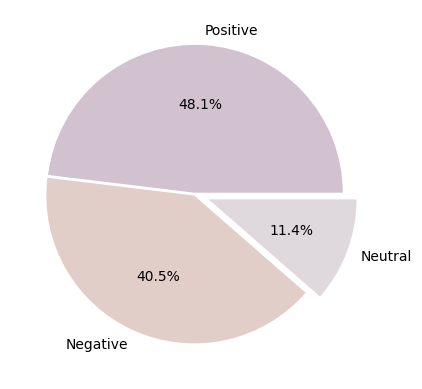

In [103]:
import matplotlib.pyplot as plt

vader_counts = data['Analysis'].value_counts()
print(vader_counts)

plt.pie(vader_counts.values, labels = vader_counts.index, explode = [0.01, 0.01, 0.1],  autopct = '%1.1f%%', colors = ['#D2C1CE','#E1CEC9', '#DFD8DC'])
plt.show()


## 7. Making a Word Cloud

(-0.5, 399.5, 199.5, -0.5)

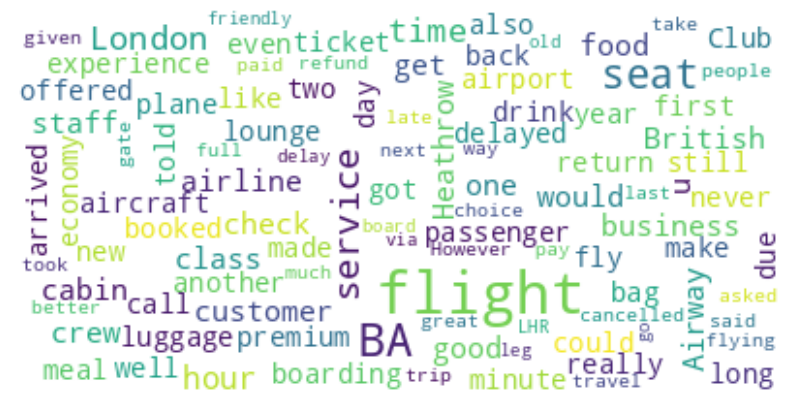

In [106]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# remove useless words from the text

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# creating word cloud

wc = WordCloud(stopwords = stop_words, collocations = False, max_font_size = 30, max_words = 100, background_color = 'white')
wc.generate(' '.join(data.Reviews))
plt.figure(figsize=(10, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis('off')

---



